Multinomial Naive Bayes

In [1]:
import csv

def read_file(file_path):
  with open(file_path) as file:
    next(file) # skip the header row
    tsv_file = csv.reader(file, delimiter="\t")

    return [line for line in tsv_file]

def get_useful_data(file_path):
  content = read_file(file_path)

  data = []
  label = []

  # The columns are: order in file | id | tweet | very neg | neg | neutral | positive | strongly pos | NA | Majority
  # So we skip the id row, take the tweet as data and take sentiment type with highest score as label
  for line in content:
    data.append(line[2])

    score_list = line[9] #Taking value from column majority

    max_score_index = int(score_list)-1
    label.append(max_score_index)

  return data, label

In [2]:
train_data, train_label = get_useful_data("cleaned_data_train.tsv")
test_data, test_label = get_useful_data("cleaned_data_test.tsv")
val_data, val_label = get_useful_data("cleaned_data_val.tsv")

In [3]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

vec = CountVectorizer(stop_words='english')

def run_model(train_data, train_label, test_data, test_label, label_to_text):
  # Vectorize tweet to numbers
  train_x = vec.fit_transform(train_data).toarray()
  test_x = vec.transform(test_data).toarray()

  model = MultinomialNB()
  model.fit(train_x, train_label)

  y_pred = model.predict(test_x)
  acc_score = accuracy_score(test_label, y_pred)
  conf_mat = confusion_matrix(test_label, y_pred)

  print(f"Accuracy {acc_score}")
  
  cmd_obj = ConfusionMatrixDisplay(conf_mat, display_labels=label_to_text) 

  cmd_obj.plot()
  cmd_obj.ax_.set(
                  title='Confusion Matrix', 
                  xlabel=f'Predicted', 
                  ylabel='Actual')  
  plt.show()

  return model, acc_score

In [4]:
# Reduce the number of label in the list into num_label labels for different test cases
def reduce_label(label_list, num_label: int = 5):
  if num_label == 3:
    return [3 if label > 2 else 2 if label == 2 else 1 for label in label_list]
  elif num_label == 2:
    return [3 if label > 2 else 1 for label in label_list]
  elif num_label == 1:
    print("You must be kidding me")
    return [2 for label in label_list]
    
  return label_list

def execute_run(num_label: int):
  print(f"Running model with {num_label} labels")
  label_to_text = ["Very Negative", "Negative", "Neutral", "Positive", "Strongly Positive"]
  if num_label == 3:
    label_to_text = ["Negative", "Neutral", "Positive"]
  elif num_label == 2:
    label_to_text = ["Negative", "Positive"]
  elif num_label == 1:
    label_to_text = ["Neutral"]

  run_model(train_data, 
            reduce_label(train_label, num_label), 
            test_data, 
            reduce_label(test_label, num_label), 
            label_to_text)
  
  print("\n~~~ End run ~~~\n\n")

Running model with 1 labels
You must be kidding me
You must be kidding me
Accuracy 1.0


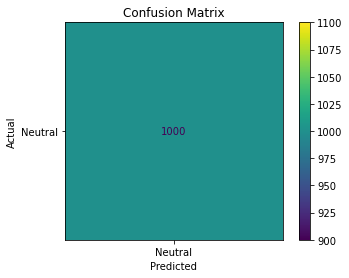


~~~ End run ~~~


Running model with 2 labels
Accuracy 0.826


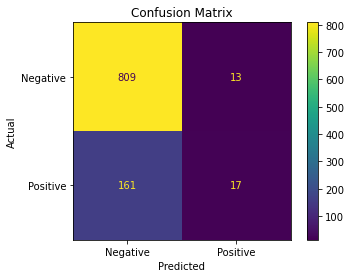


~~~ End run ~~~


Running model with 3 labels
Accuracy 0.61


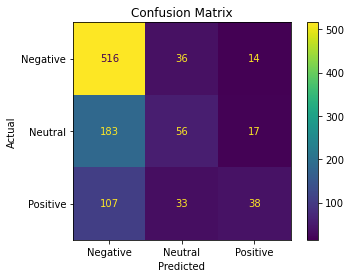


~~~ End run ~~~


Running model with 5 labels
Accuracy 0.501


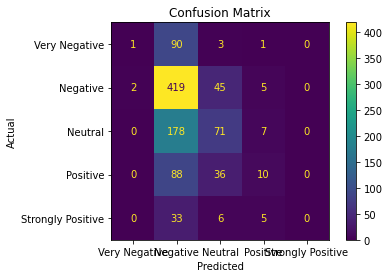


~~~ End run ~~~




In [5]:
execute_run(1)
execute_run(2)
execute_run(3)
execute_run(5)

Note: some reason why accuracy is too low

* Possibly because data is skewed. Based on the confusion matrix, seems like there aren't a lot of data in the range of Very Negative or positive side
* Naive Bayers is too simple, it doesn't take into account of the context of the words

**Logistic Regression Model**

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
import nltk
nltk.download('omw-1.4')

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
import csv

Load train data

In [3]:
def read_file(file_path):
  with open(file_path) as file:
    next(file) # skip the header row
    tsv_file = csv.reader(file, delimiter="\t")

    return [line for line in tsv_file]

def get_useful_data(file_path):
  content = read_file(file_path)

  data = []
  label = []

  # The columns are: order in file | id | tweet | very neg | neg | neutral | positive | strongly pos | NA | Majority
  # So we skip the id row, take the tweet as data and take sentiment type with highest score as label
  for line in content:
    data.append(line[2])

    score_list=line[9] # Taking data from column Majority


    max_score_index = int(score_list)-1
    label.append(max_score_index)

  return data, label

In [4]:
train_data, train_label = get_useful_data("cleaned_data_train.tsv")
test_data, test_label = get_useful_data("cleaned_data_test.tsv")

Data preprocessing

In [5]:
def data_processing(tweet):
    tweet = tweet.lower()  #to uniform the text into lowercase
    tweet = re.sub(r'\@w+|\#|[^\w\s]|ð','',tweet)
    tokens = word_tokenize(tweet)  #tokenizing
    processed_tweets = [w for w in tokens if not w in stop_words]  
    return " ".join(processed_tweets)

In [6]:
train_data = [data_processing(tweet) for tweet in train_data]
test_data = [data_processing(tweet) for tweet in test_data]

In [7]:
#Lemmatizing
lemmatizer = WordNetLemmatizer()  
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [8]:
train_data = [lemmatizing(tweet) for tweet in train_data]
test_data = [lemmatizing(tweet) for tweet in test_data]

Using tigram language

In [9]:
vector = TfidfVectorizer(ngram_range=(1,3)).fit(train_data + test_data)

In [10]:
x_train = vector.transform(train_data)
y_train = train_label

x_test = vector.transform(test_data)
y_test = test_label

Running model with 2 labels
Accuracy 0.837


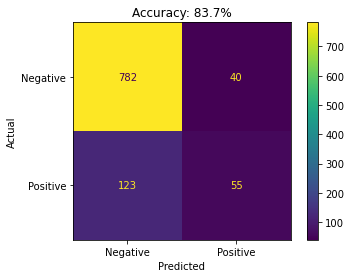


~~~ End run ~~~


Running model with 3 labels


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.619


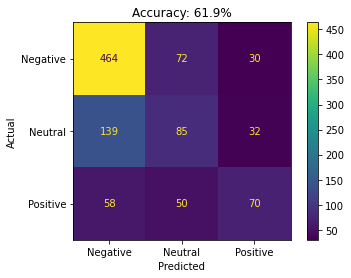


~~~ End run ~~~


Running model with 5 labels


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.489


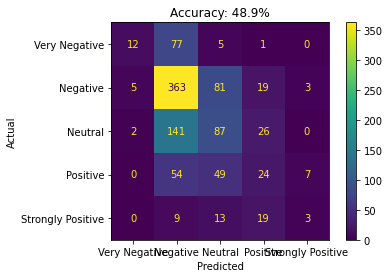


~~~ End run ~~~




In [11]:
vec = CountVectorizer(stop_words='english')

def run_model(train_data, train_label, test_data, test_label, label_to_text):
  train_x = vec.fit_transform(train_data).toarray()
  test_x = vec.transform(test_data).toarray()

  model = LogisticRegression()
  model.fit(train_x, train_label)

  y_pred = model.predict(test_x)
  acc_score = accuracy_score(test_label, y_pred)
  conf_mat = confusion_matrix(test_label, y_pred)

  print(f"Accuracy {acc_score}")
  
  cmd_obj = ConfusionMatrixDisplay(conf_mat, display_labels=label_to_text) 
 
  cmd_obj.plot()
  cmd_obj.ax_.set(
                  title= "Accuracy: " + str(round(acc_score, 3) *100) +"%", 
                  xlabel=f'Predicted', 
                  ylabel='Actual')  
  plt.show()

  return model, acc_score


# Reduce the number of label in the list into num_label labels for different test cases
def reduce_label(label_list, num_label: int = 5):
  if num_label == 3:
    return [3 if label > 2 else 2 if label == 2 else 1 for label in label_list]
  elif num_label == 2:
    return [3 if label > 2 else 1 for label in label_list]
  elif num_label == 1:
    return [2 for label in label_list]
    
  return label_list

def execute_run(num_label: int):
  print(f"Running model with {num_label} labels")
  label_to_text = ["Very Negative", "Negative", "Neutral", "Positive", "Strongly Positive"]
  if num_label == 3:
    label_to_text = ["Negative", "Neutral", "Positive"]
  elif num_label == 2:
    label_to_text = ["Negative", "Positive"]
  elif num_label == 1:
    label_to_text = ["Neutral"]

  run_model(train_data, 
            reduce_label(train_label, num_label), 
            test_data, 
            reduce_label(test_label, num_label), 
            label_to_text)
  
  print("\n~~~ End run ~~~\n\n")


execute_run(2)
execute_run(3)
execute_run(5)

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
prediction = model.predict(x_test)

In [23]:
accuracy = accuracy_score(prediction,y_test)

In [24]:
print(accuracy)

0.494


Confusion matrix: 



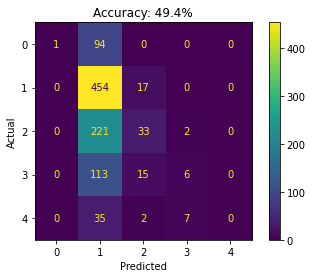

In [25]:
conf_matx=confusion_matrix(y_test,prediction)
print("Confusion matrix: \n")
cmd_obj = ConfusionMatrixDisplay(conf_matx) 
disp_accuracy = "Accuracy: " + str(round(accuracy, 4) *100) +"%" 
cmd_obj.plot()
cmd_obj.ax_.set(
                title= disp_accuracy, 
                xlabel=f'Predicted', 
                ylabel='Actual')  
plt.show()

In [26]:
class_report=classification_report(y_test,prediction)
print("Classification report: \n")
print(class_report)

Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        95
           1       0.50      0.96      0.65       471
           2       0.49      0.13      0.20       256
           3       0.40      0.04      0.08       134
           4       0.00      0.00      0.00        44

    accuracy                           0.49      1000
   macro avg       0.48      0.23      0.19      1000
weighted avg       0.51      0.49      0.37      1000



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
